<a href="https://colab.research.google.com/github/DjengoFang/Financial-Engineering-Ruppert-Matteson-/blob/main/Lab7.13.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
url = 'https://raw.githubusercontent.com/DjengoFang/Financial-Engineering-Ruppert-Matteson-/main/datasets/berndtInvest.csv'
berndtInvest = pd.read_csv(url)

In [3]:
berndtInvest.head()

,X.Y..m..d,CITCRP,CONED,CONTIL,DATGEN,DEC,DELTA,GENMIL,GERBER,IBM,MARKET,MOBIL,PANAM,PSNH,TANDY,TEXACO,WEYER,RKFREE
0,1978-01-01,-0.115,-0.079,-0.129,-0.084,-0.100,-0.028,-0.099,-0.048,-0.029,-0.045,-0.046,0.025,-0.008,-0.075,-0.054,-0.116,0.00487
1,1978-02-01,-0.019,-0.003,0.037,-0.097,-0.063,-0.033,0.018,0.160,-0.043,0.010,-0.017,-0.073,-0.025,-0.004,-0.010,-0.135,0.00494
2,1978-03-01,0.059,0.022,0.003,0.063,0.010,0.070,-0.023,-0.036,-0.063,0.050,0.049,0.184,0.026,0.124,0.015,0.084,0.00526
3,1978-04-01,0.127,-0.005,0.180,0.179,0.165,0.150,0.046,0.004,0.130,0.063,0.077,0.089,-0.008,0.055,0.000,0.144,0.00491
4,1978-05-01,0.005,-0.014,0.061,0.052,0.038,-0.031,0.063,0.046,-0.018,0.067,-0.011,0.082,0.019,0.176,-0.029,-0.031,0.00513


In [4]:
berndtInvest.describe()

,CITCRP,CONED,CONTIL,DATGEN,DEC,DELTA,GENMIL,GERBER,IBM,MARKET,MOBIL,PANAM,PSNH,TANDY,TEXACO,WEYER,RKFREE
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.011858,0.018508,-0.001100,0.007483,0.019750,0.011692,0.016583,0.016400,0.009617,0.013992,0.016192,0.003517,-0.004217,0.025008,0.011942,0.009633,0.006839
std,0.080972,0.050272,0.150699,0.127540,0.099144,0.095932,0.065040,0.087738,0.059024,0.068353,0.080308,0.131805,0.109471,0.127566,0.079704,0.085066,0.002187
min,-0.282000,-0.139000,-0.600000,-0.342000,-0.364000,-0.260000,-0.148000,-0.288000,-0.187000,-0.260000,-0.178000,-0.313000,-0.485000,-0.246000,-0.194000,-0.271000,0.002070
25%,-0.036750,-0.012000,-0.051250,-0.072000,-0.050500,-0.053250,-0.026250,-0.036000,-0.029000,-0.013250,-0.032250,-0.065250,-0.048500,-0.058000,-0.037000,-0.048500,0.005222
50%,0.011500,0.019500,0.000000,0.017000,0.024000,0.013000,0.011500,0.015500,0.002000,0.012000,0.012500,0.000000,0.000000,0.022500,0.010500,-0.002000,0.006600
75%,0.064250,0.045250,0.058000,0.078250,0.075000,0.063000,0.060250,0.065250,0.049750,0.062250,0.056750,0.074250,0.043500,0.094000,0.047500,0.060500,0.007763
max,0.318000,0.151000,0.974000,0.528000,0.385000,0.289000,0.190000,0.234000,0.150000,0.148000,0.366000,0.406000,0.318000,0.454000,0.399000,0.270000,0.012550


# Correlation Matrix

In [5]:
berndtInvest.corr()

,CITCRP,CONED,CONTIL,DATGEN,DEC,DELTA,GENMIL,GERBER,IBM,MARKET,MOBIL,PANAM,PSNH,TANDY,TEXACO,WEYER,RKFREE
CITCRP,1.000000,0.268590,0.495983,0.533458,0.488809,0.397174,0.472767,0.447346,0.423703,0.563710,0.311058,0.304717,0.105735,0.503124,0.288727,0.539996,0.001122
CONED,0.268590,1.000000,0.104999,0.095524,0.108088,0.091872,0.328901,0.171444,0.090927,0.123759,0.003381,0.163384,0.112000,0.101949,-0.106457,0.158090,0.057350
CONTIL,0.495983,0.104999,1.000000,0.262758,0.230402,0.172555,0.205635,0.374780,0.252485,0.334899,0.206045,0.134826,0.113169,0.245802,0.183099,0.213616,0.086026
DATGEN,0.533458,0.095524,0.262758,1.000000,0.575971,0.329860,0.279569,0.140120,0.489718,0.551027,0.315511,0.286944,0.081434,0.513642,0.315917,0.480614,-0.101820
DEC,0.488809,0.108088,0.230402,0.575971,1.000000,0.428754,0.211605,0.162479,0.444067,0.581231,0.410134,0.265442,0.043574,0.491929,0.247659,0.590118,-0.138545
DELTA,0.397174,0.091872,0.172555,0.329860,0.428754,1.000000,0.373392,0.191519,0.336393,0.348750,0.133150,0.389191,0.027749,0.464298,0.132438,0.490076,0.006945
GENMIL,0.472767,0.328901,0.205635,0.279569,0.211605,0.373392,1.000000,0.349505,0.169790,0.281403,0.046577,0.206911,0.059269,0.400320,0.001902,0.356965,-0.007654
GERBER,0.447346,0.171444,0.374780,0.140120,0.162479,0.191519,0.349505,1.000000,0.297158,0.486763,0.322832,0.168196,0.062328,0.196499,0.303824,0.277618,-0.029292
IBM,0.423703,0.090927,0.252485,0.489718,0.444067,0.336393,0.169790,0.297158,1.000000,0.524628,0.321196,0.212580,0.072600,0.334169,0.219978,0.491819,-0.107328
MARKET,0.563710,0.123759,0.334899,0.551027,0.581231,0.348750,0.281403,0.486763,0.524628,1.000000,0.607304,0.378645,0.132766,0.565561,0.525942,0.656376,-0.099660


#  Covariance Matrix 

In [6]:
berndtInvest.cov()

,CITCRP,CONED,CONTIL,DATGEN,DEC,DELTA,GENMIL,GERBER,IBM,MARKET,MOBIL,PANAM,PSNH,TANDY,TEXACO,WEYER,RKFREE
CITCRP,6.556442e-03,0.001093,0.006052,0.005509,0.003924,0.003085,0.002490,0.003178,0.002025,0.003120,0.002023,0.003252,0.000937,0.005197,0.001863,0.003719,1.986211e-07
CONED,1.093325e-03,0.002527,0.000795,0.000612,0.000539,0.000443,0.001075,0.000756,0.000270,0.000425,0.000014,0.001083,0.000616,0.000654,-0.000427,0.000676,6.304928e-06
CONTIL,6.052187e-03,0.000795,0.022710,0.005050,0.003442,0.002495,0.002016,0.004955,0.002246,0.003450,0.002494,0.002678,0.001867,0.004725,0.002199,0.002738,2.835070e-05
DATGEN,5.509103e-03,0.000612,0.005050,0.016266,0.007283,0.004036,0.002319,0.001568,0.003687,0.004804,0.003232,0.004824,0.001137,0.008357,0.003211,0.005214,-2.839889e-05
DEC,3.924090e-03,0.000539,0.003442,0.007283,0.009829,0.004078,0.001365,0.001413,0.002599,0.003939,0.003265,0.003469,0.000473,0.006222,0.001957,0.004977,-3.003842e-05
DELTA,3.085158e-03,0.000443,0.002495,0.004036,0.004078,0.009203,0.002330,0.001612,0.001905,0.002287,0.001026,0.004921,0.000291,0.005682,0.001013,0.003999,1.457039e-06
GENMIL,2.489798e-03,0.001075,0.002016,0.002319,0.001365,0.002330,0.004230,0.001994,0.000652,0.001251,0.000243,0.001774,0.000422,0.003321,0.000010,0.001975,-1.088662e-06
GERBER,3.178082e-03,0.000756,0.004955,0.001568,0.001413,0.001612,0.001994,0.007698,0.001539,0.002919,0.002275,0.001945,0.000599,0.002199,0.002125,0.002072,-5.620185e-06
IBM,2.024996e-03,0.000270,0.002246,0.003687,0.002599,0.001905,0.000652,0.001539,0.003484,0.002117,0.001522,0.001654,0.000469,0.002516,0.001035,0.002469,-1.385357e-05
MARKET,3.119957e-03,0.000425,0.003450,0.004804,0.003939,0.002287,0.001251,0.002919,0.002117,0.004672,0.003334,0.003411,0.000993,0.004931,0.002865,0.003817,-1.489707e-05


# Scatter Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4d767af340>,
      dtype=object)

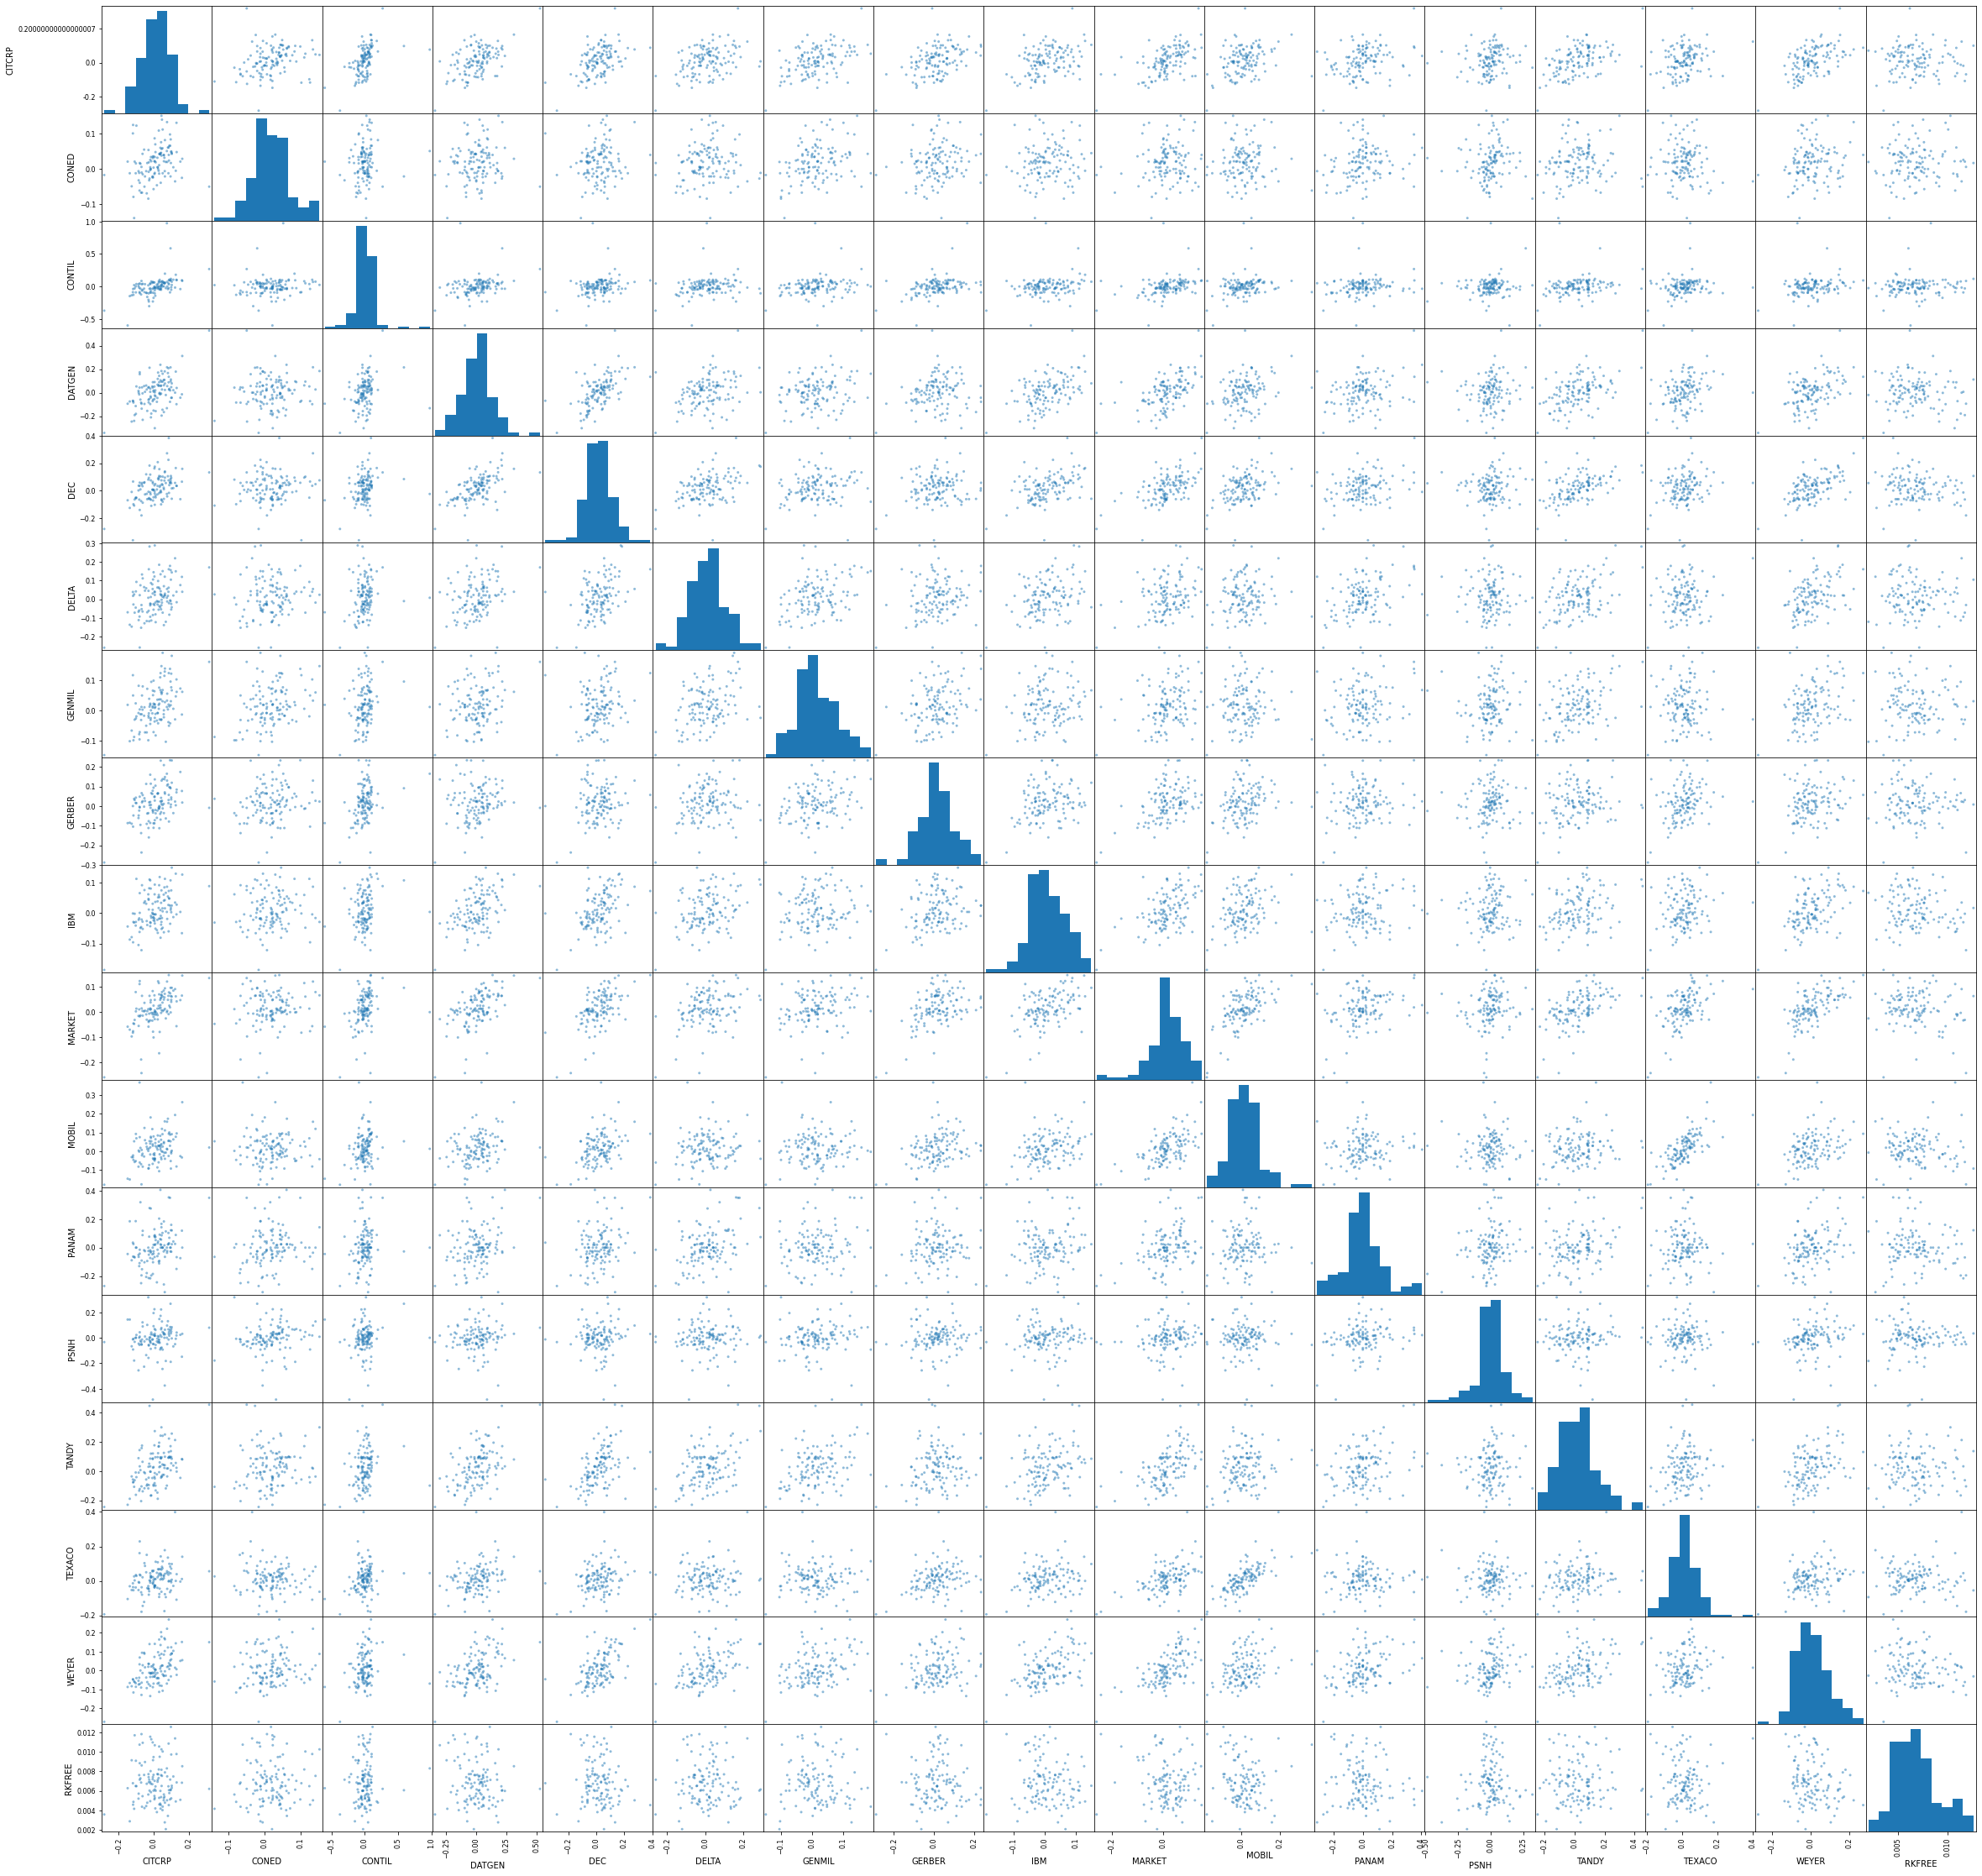

In [7]:
pd.plotting.scatter_matrix(frame=berndtInvest, alpha=0.5, figsize=(40,40))

# Problem 1
## Variance of 0.5CITCRP + 0.3CONED + 0.2CONTIL

In [8]:
w = np.transpose(np.array([0.5, 0.3, 0.2]))
cov_x = berndtInvest.cov().iloc[:3, :3].to_numpy()
print(cov_x)

[[0.00655644 0.00109332 0.00605219]
 [0.00109332 0.00252726 0.00079546]
 [0.00605219 0.00079546 0.02271026]]


In [9]:
np.matmul(np.matmul(np.transpose(w), cov_x), w)

0.0044088647366946785

In [10]:
np.transpose(w) @ cov_x @ w

0.0044088647366946785